In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Load data
df = pd.read_excel("FULLSET(2).xls")
df.head()

,JK,Usia Saat Ukur,Berat,Tinggi,BB/U,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB
0,L,35,14.6,98.7,Normal,0.19,Normal,0.78,Normal,-0.33
1,L,36,14.6,98.7,Normal,0.09,Normal,0.60,Normal,-0.33
2,L,37,14.7,98.7,Normal,0.05,Normal,0.42,Normal,-0.25
3,L,40,15.0,100.8,Normal,-0.06,Normal,0.46,Normal,-0.46
4,L,41,16.2,102.0,Normal,0.46,Normal,0.60,Normal,0.20


In [ ]:
# Preprocessing & Pemilihan fitur X dan Y yang digunakan
df = df.dropna()
df['JK'] = df['JK'].map({'L': 1, 'P': 0})  # Encode jenis kelamin

# Encode label BB/U: Kurang=0, Normal=1, Lebih=2
label_mapping_berat = {"Kurang": 0, "Normal": 1, "Lebih": 2}
df['BB/U'] = df['BB/U'].map(label_mapping_berat)
label_mapping_tinggi = {"Pendek": 0, "Normal": 1, "Tinggi": 2}
df['TB/U'] = df['TB/U'].map(label_mapping_tinggi)
label_mapping_beratdantinggi = {"Kurang": 0, "Normal": 1, "Lebih": 2}
df['BB/TB'] = df['BB/TB'].map(label_mapping_beratdantinggi)

features = ['JK', 'Usia Saat Ukur', 'Berat', 'Tinggi']
targets = ['BB/U']

df.head()

,JK,Usia Saat Ukur,Berat,Tinggi,BB/U,ZS BB/U,TB/U,ZS TB/U,BB/TB,ZS BB/TB
0,1,35,14.6,98.7,1,0.19,1,0.78,1,-0.33
1,1,36,14.6,98.7,1,0.09,1,0.60,1,-0.33
2,1,37,14.7,98.7,1,0.05,1,0.42,1,-0.25
3,1,40,15.0,100.8,1,-0.06,1,0.46,1,-0.46
4,1,41,16.2,102.0,1,0.46,1,0.60,1,0.20


In [ ]:
df['BB/U'].value_counts()

,count
BB/U,
1,2206
0,273
2,181


In [ ]:
X = df[features]
y = df[targets]

print(len(X))
print(len(y))

2660
2660


In [ ]:
#Split Function
def get_data(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

X_train_90, X_test_10, y_train_90, y_test_10 = get_data(X, y, 0.1)
X_train_80, X_test_20, y_train_80, y_test_20 = get_data(X, y, 0.2)
X_train_70, X_test_30, y_train_70, y_test_30 = get_data(X, y, 0.3)
X_train_60, X_test_40, y_train_60, y_test_40 = get_data(X, y, 0.4)

In [ ]:
# Pemodelan LightGBM & Fungsi evaluasi
def evaluate_model(X_train, X_test, y_train, y_test):
    model = lgb.LGBMClassifier( learning_rate=0.1,
    num_iterations=100,
    min_data_in_leaf=20,
    random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'y_test': y_test
    }

In [ ]:
# Menjalankan Evaluasi untuk semua Ratio
result_90 = evaluate_model(X_train_90, X_test_10, y_train_90, y_test_10)
result_80 = evaluate_model(X_train_80, X_test_20, y_train_80, y_test_20)
result_70 = evaluate_model(X_train_70, X_test_30, y_train_70, y_test_30)
result_60 = evaluate_model(X_train_60, X_test_40, y_train_60, y_test_40)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 2394, number of used features: 4
[LightGBM] [Info] Start training from score -2.295924
[LightGBM] [Info] Start training from score -0.185334
[LightGBM] [Info] Start training from score -2.680854
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_


🔹 Rasio Train:Test = 90:10
  Accuracy : 0.96
  Precision: 0.93
  Recall   : 0.89
  F1-Score : 0.91


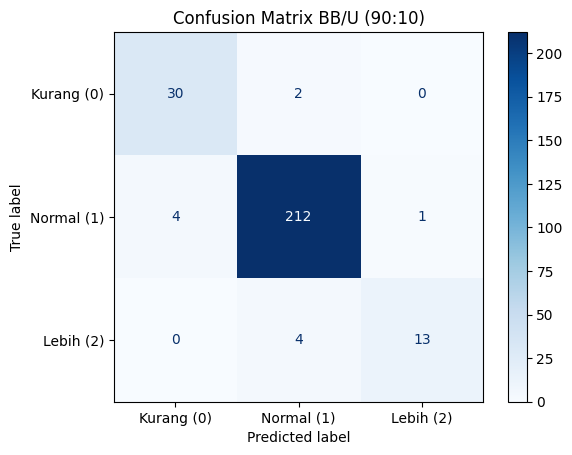


🔹 Rasio Train:Test = 80:20
  Accuracy : 0.96
  Precision: 0.92
  Recall   : 0.87
  F1-Score : 0.90


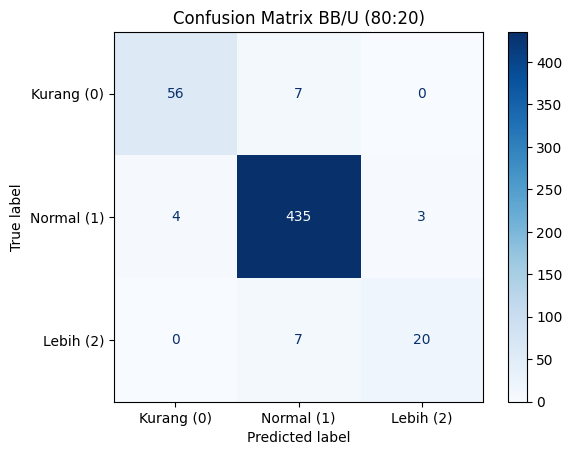


🔹 Rasio Train:Test = 70:30
  Accuracy : 0.96
  Precision: 0.91
  Recall   : 0.90
  F1-Score : 0.90


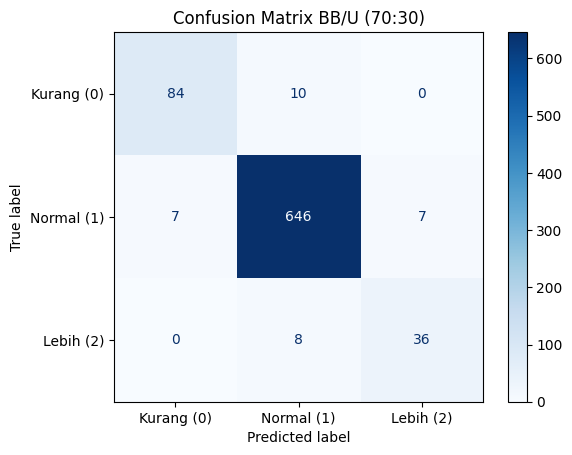


🔹 Rasio Train:Test = 60:40
  Accuracy : 0.96
  Precision: 0.92
  Recall   : 0.88
  F1-Score : 0.90


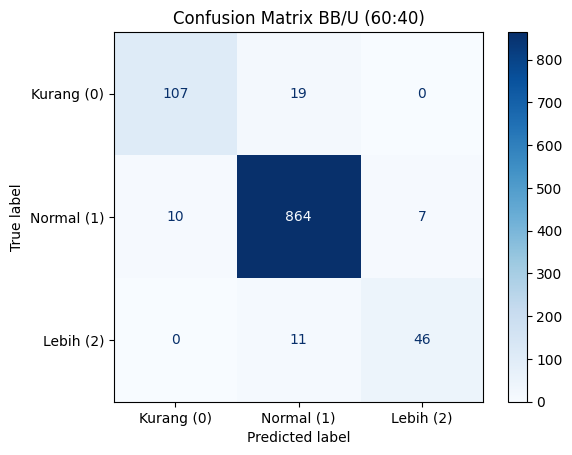

In [ ]:
# Visualisasi Confusion Matrix
result_arr = [result_90, result_80, result_70, result_60]
train_test_ratios = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]
labels = [0, 1, 2]
label_names = ["Kurang (0)", "Normal (1)", "Lebih (2)"]

for result, (train_size, test_size) in zip(result_arr, train_test_ratios):
    print(f"\n🔹 Rasio Train:Test = {int(train_size*100)}:{int(test_size*100)}")
    print(f"  Accuracy : {result['accuracy']:.2f}")
    print(f"  Precision: {result['precision']:.2f}")
    print(f"  Recall   : {result['recall']:.2f}")
    print(f"  F1-Score : {result['f1']:.2f}")

    y_test = result['y_test']
    y_pred = result['y_pred']

    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix BB/U ({int(train_size*100)}:{int(test_size*100)})')
    plt.show()

In [ ]:
def get_table(result_90, result_80, result_70, result_60):
    data = {
        'Train:Test Ratio': ['90:10', '80:20', '70:30', '60:40'],
        'Accuracy': [result_90['accuracy'], result_80['accuracy'], result_70['accuracy'], result_60['accuracy']],
        'Precision': [result_90['precision'], result_80['precision'], result_70['precision'], result_60['precision']],
        'Recall': [result_90['recall'], result_80['recall'], result_70['recall'], result_60['recall']],
        'F1-Score': [result_90['f1'], result_80['f1'], result_70['f1'], result_60['f1']]
    }
    df = pd.DataFrame(data)
    return df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

eval_df = get_table(result_90, result_80, result_70, result_60)
print(eval_df)

  Train:Test Ratio  Accuracy  Precision    Recall  F1-Score
0            80:20  0.960526   0.923906  0.871264  0.895667
1            70:30  0.959900   0.911059  0.896862  0.903842
2            90:10  0.958647   0.927800  0.893055  0.907504
3            60:40  0.955827   0.916299  0.878976  0.896848


In [ ]:
eval_df = get_table(result_90, result_80, result_70, result_60)
eval_df

,Train:Test Ratio,Accuracy,Precision,Recall,F1-Score
0,80:20,0.960526,0.923906,0.871264,0.895667
1,70:30,0.959900,0.911059,0.896862,0.903842
2,90:10,0.958647,0.927800,0.893055,0.907504
3,60:40,0.955827,0.916299,0.878976,0.896848


In [ ]:
import pickle

# Misal ini hasil dari training
result = result_80['model']

# Simpan ke file
with open('lgbm_terlatih_80.pkl', 'wb') as f:
    pickle.dump(result, f)